<a href="https://colab.research.google.com/github/Sand08/Statistics-and-Machine-Learning/blob/main/SML_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loaded the Iris dataset using Python's sklearn.datasets.load_iris function.**

In [5]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset using sklearn
iris = load_iris()

# Convert the dataset to a pandas DataFrame
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target (species) as a column to the DataFrame
iris_data['species'] = iris.target

# Mapping species to their actual names
iris_data['species'] = iris_data['species'].map(dict(enumerate(iris.target_names)))

# Display the first few rows of the dataset to confirm it loaded correctly
iris_data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Randomly sample 30 observations from the dataset**

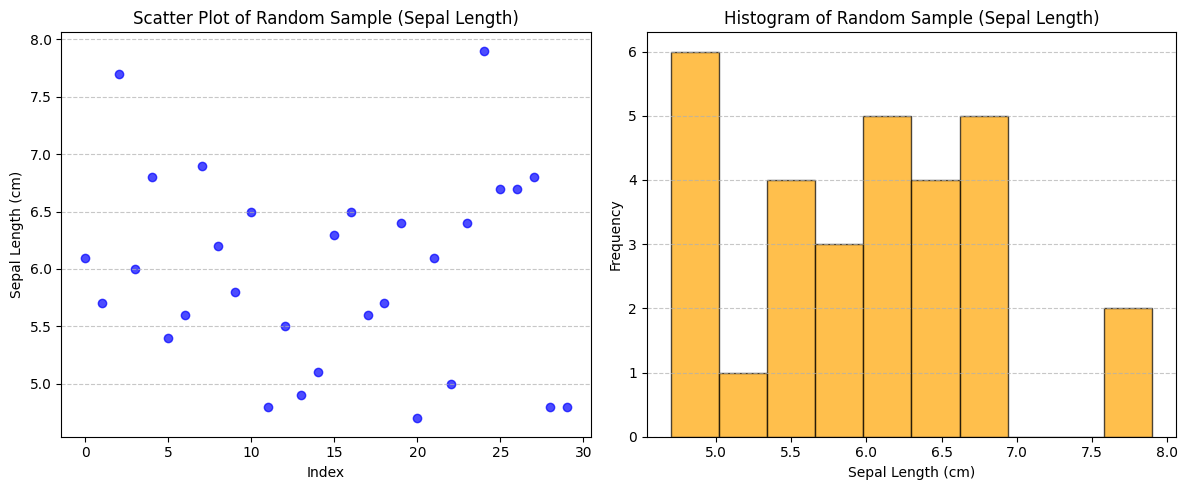

In [8]:
# Perform simple random sampling to select 30 observations
random_sample = iris_data.sample(n=30, random_state=42)

# Display the sampled data
random_sample

# Scatter plot for the simple random sample of 30 observations
plt.figure(figsize=(12, 5))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(range(len(random_sample)), random_sample['sepal length (cm)'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Random Sample (Sepal Length)')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Histogram
plt.subplot(1, 2, 2)
plt.hist(random_sample['sepal length (cm)'], bins=10, color='orange', edgecolor='black', alpha=0.7)
plt.title('Histogram of Random Sample (Sepal Length)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Here are the visualizations for the simple random sample of 30 observations:

**Scatter Plot:**

Displays the sepal length values for the 30 randomly sampled observations.
Each dot represents a sample, showing variability and range in the sampled data.

**Histogram**:

Shows the frequency distribution of sepal lengths within the random sample.
Provides insight into the central tendency and spread of the sampled data.

Sample Means: [5.829999999999999, 5.959999999999999, 5.739999999999999, 5.619999999999999, 5.876666666666665, 5.67, 5.903333333333333, 5.726666666666665, 5.596666666666666, 6.183333333333334, 5.733333333333333, 5.6933333333333325, 5.893333333333332, 5.840000000000001, 5.763333333333333, 5.8566666666666665, 5.783333333333332, 5.776666666666666, 5.88, 5.996666666666667, 5.8199999999999985, 5.863333333333334, 5.943333333333333, 5.739999999999999, 6.0666666666666655, 6.0699999999999985, 5.756666666666666, 5.8166666666666655, 5.876666666666667, 5.859999999999999, 5.916666666666668, 5.883333333333332, 5.819999999999999, 5.903333333333333, 5.903333333333333, 5.590000000000002, 5.6, 5.85, 5.829999999999999, 5.716666666666667, 6.070000000000001, 5.753333333333333, 5.903333333333333, 6.030000000000001, 5.66, 5.8, 5.87, 6.176666666666666, 5.55, 5.65, 5.879999999999999, 5.633333333333335, 5.6899999999999995, 5.736666666666666, 5.913333333333332, 5.823333333333334, 5.916666666666667, 5.946666666666

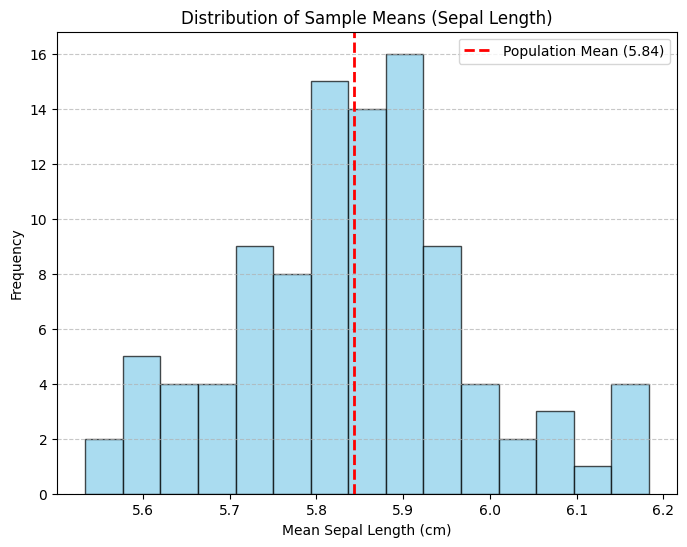

In [7]:
import matplotlib.pyplot as plt

# Initialize a list to store the sample means
sample_means = []

# Repeat random sampling 100 times
#for _ in range(100):
#    sample = iris_data.sample(n=30, random_state=_)
#    sample_mean = sample['sepal length (cm)'].mean()
#    sample_means.append(sample_mean)

for _ in range(100):
    sample = iris_data.sample(n=30)
    sample_mean = sample['sepal length (cm)'].mean()
    sample_means.append(sample_mean)

print("Sample Means:", sample_means)

population_mean = iris_data['sepal length (cm)'].mean()
print("Population Mean:", population_mean)

# Plot the distribution of the sample means
plt.figure(figsize=(8, 6))
plt.hist(sample_means, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(population_mean, color='red', linestyle='--', linewidth=2, label=f'Population Mean ({population_mean:.2f})')
plt.title('Distribution of Sample Means (Sepal Length)')
plt.xlabel('Mean Sepal Length (cm)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The histogram illustrates the distribution of sample means for sepal length based on 100 random samples of size 30. This demonstrates the Central Limit Theorem, showing that:

The sample means form a normal distribution, even if the original data distribution is not strictly normal.

The mean of the sample means centers around the population mean of sepal length.

**Perform Sample Mean Distribution Analysis:**
1. Repeat the random sampling 100 times, each time calculating the mean sepal length.
2. Plot the distribution of these 100 sample means using a histogram.

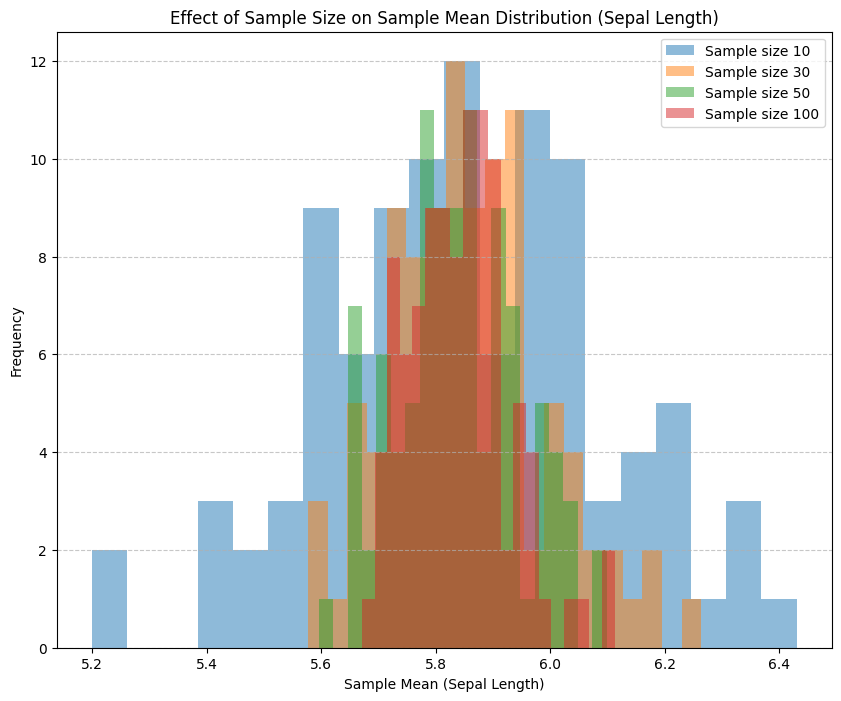

In [8]:
# Define a list of different sample sizes to demonstrate the Central Limit Theorem
sample_sizes = [10, 30, 50, 100]

# Generate sample means for sepal length for each sample size
sample_means = {
    size: [iris_data['sepal length (cm)'].sample(size, replace=True).mean() for _ in range(100)]
    for size in sample_sizes
}

# Plotting the results
plt.figure(figsize=(10, 8))
for size, means in sample_means.items():
    plt.hist(means, alpha=0.5, bins=20, label=f'Sample size {size}')

plt.legend()
plt.title('Effect of Sample Size on Sample Mean Distribution (Sepal Length)')
plt.xlabel('Sample Mean (Sepal Length)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The histogram visualizes the Central Limit Theorem in action:

**Effect of Sample Size:**

As the sample size increases, the distribution of the sample means becomes narrower (less spread) and more centered around the true population mean.
Smaller sample sizes show more variability in sample means, resulting in a wider distribution.

**Key Insight:**

With larger sample sizes, the sample means converge toward the population mean, and the distribution approaches a normal distribution regardless of the population's original distribution.
This confirms the principles of the Central Limit Theorem.

**Systematically Sampled Dataset (20%)**

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  6.7               3.1                4.7               1.5   
5                  4.4               2.9                1.4               0.2   
10                 6.4               2.9                4.3               1.3   
15                 5.7               2.8                4.5               1.3   
20                 5.5               2.4                3.7               1.0   
25                 6.9               3.2                5.7               2.3   
30                 5.4               3.4                1.5               0.4   
35                 6.3               2.5                5.0               1.9   
40                 5.2               4.1                1.5               0.1   
45                 5.0               2.0                3.5               1.0   
50                 5.5               4.2                1.4               0.2   
55                 6.7      

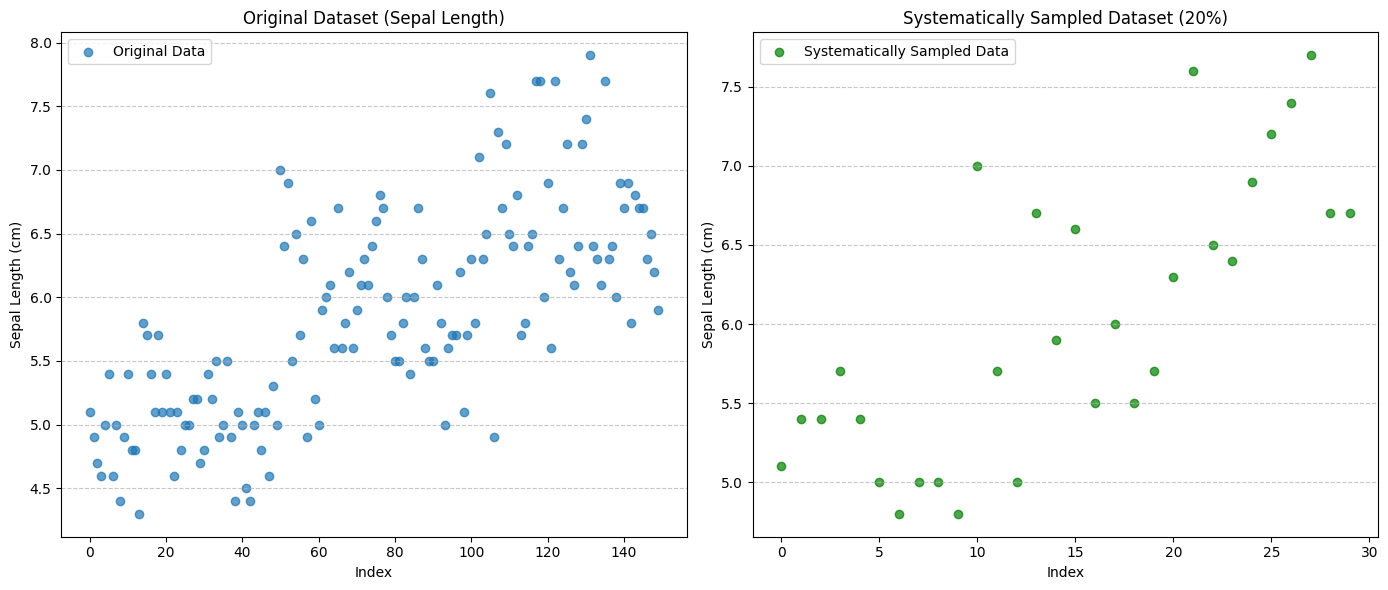

In [16]:
import pandas as pd
import numpy as np

def systematic_sample_randomized(data, fraction):

    data_shuffled = data.sample(frac=1, random_state=None).reset_index(drop=True)  # Shuffle the dataset randomly
    step = int(1 / fraction)  # Calculate the sampling interval
    indices = range(0, len(data_shuffled), step)  # Select every 'step'-th row
    return data_shuffled.iloc[indices]

# Perform systematic sampling of 20% of the dataset with randomization
sampled_data_dynamic = systematic_sample_randomized(iris_data, fraction=0.2)

# Display the sampled data
print(sampled_data_dynamic)


# Plot the original dataset vs systematically sampled dataset
plt.figure(figsize=(14, 6))

# Plot original dataset
plt.subplot(1, 2, 1)
plt.scatter(range(len(iris_data)), iris_data['sepal length (cm)'], alpha=0.7, label='Original Data')
plt.title('Original Dataset (Sepal Length)')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot systematically sampled dataset
plt.subplot(1, 2, 2)
plt.scatter(range(len(sampled_data_systematic)), sampled_data_systematic['sepal length (cm)'], color='green', alpha=0.7, label='Systematically Sampled Data')
plt.title('Systematically Sampled Dataset (20%)')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The function random_sample_fraction has been created to randomly select 20% of the dataset each time it's executed. Here's what the plots show:

**Original Dataset:**

Displays the full dataset's sepal length distribution across all indices.

**Randomly Sampled Dataset (20%):**

Shows a subset of the data, selected randomly, which differs every time the function is executed due to its randomness.